# Movielens Case Study

In [1]:
# import library
import pandas as pd
pd.set_option('max_columns',None)
pd.set_option('max_rows',None)
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

##### Import the three datasets.

In [2]:
movies = pd.read_csv('movies.dat' , delimiter = '::' , names = ['MovieID' , 'Title' , 'Genres'],encoding='latin-1')
ratings = pd.read_csv('ratings.dat' , delimiter = '::' , names = ['UserID' , 'MovieID' , 'Rating' , 'Timestamp'],encoding='latin-1' )
users = pd.read_csv('users.dat' , delimiter = '::' , names = ['UserID' , 'Gender' , 'Age' ,'Occupation' ,'Zip_code'],encoding='latin-1')

##### Descriptive Statistics

In [3]:
# On movies data
movies.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
movies.shape

(3883, 3)

In [5]:
# Results show that no columns are empty or null.
movies.isnull().sum()

MovieID    0
Title      0
Genres     0
dtype: int64

In [6]:
movies.describe()

,MovieID
count,3883.000000
mean,1986.049446
std,1146.778349
min,1.000000
25%,982.500000
50%,2010.000000
75%,2980.500000
max,3952.000000


In [7]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   MovieID  3883 non-null   int64 
 1   Title    3883 non-null   object
 2   Genres   3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [8]:
# On ratings data
ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [9]:
ratings.shape

(1000209, 4)

In [10]:
# Results show that no columns are empty or null.
ratings.isnull().sum()

UserID       0
MovieID      0
Rating       0
Timestamp    0
dtype: int64

In [11]:
ratings.describe()

,UserID,MovieID,Rating,Timestamp
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06
mean,3.024512e+03,1.865540e+03,3.581564e+00,9.722437e+08
std,1.728413e+03,1.096041e+03,1.117102e+00,1.215256e+07
min,1.000000e+00,1.000000e+00,1.000000e+00,9.567039e+08
25%,1.506000e+03,1.030000e+03,3.000000e+00,9.653026e+08
50%,3.070000e+03,1.835000e+03,4.000000e+00,9.730180e+08
75%,4.476000e+03,2.770000e+03,4.000000e+00,9.752209e+08
max,6.040000e+03,3.952000e+03,5.000000e+00,1.046455e+09


In [12]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   UserID     1000209 non-null  int64
 1   MovieID    1000209 non-null  int64
 2   Rating     1000209 non-null  int64
 3   Timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


In [13]:
# On users data
users.head()

,UserID,Gender,Age,Occupation,Zip_code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [14]:
users.shape

(6040, 5)

In [15]:
# Results show that no columns are empty or null.
users.isnull().sum()

UserID        0
Gender        0
Age           0
Occupation    0
Zip_code      0
dtype: int64

In [16]:
ratings.describe()

,UserID,MovieID,Rating,Timestamp
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06
mean,3.024512e+03,1.865540e+03,3.581564e+00,9.722437e+08
std,1.728413e+03,1.096041e+03,1.117102e+00,1.215256e+07
min,1.000000e+00,1.000000e+00,1.000000e+00,9.567039e+08
25%,1.506000e+03,1.030000e+03,3.000000e+00,9.653026e+08
50%,3.070000e+03,1.835000e+03,4.000000e+00,9.730180e+08
75%,4.476000e+03,2.770000e+03,4.000000e+00,9.752209e+08
max,6.040000e+03,3.952000e+03,5.000000e+00,1.046455e+09


In [17]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   UserID     1000209 non-null  int64
 1   MovieID    1000209 non-null  int64
 2   Rating     1000209 non-null  int64
 3   Timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


##### Create a new dataset [Master_Data] with the following columns MovieID Title UserID Age Gender Occupation Rating. (Hint: (i) Merge two tables at a time. (ii) Merge the tables using two primary keys MovieID & UserId).

In [18]:
df = pd.merge(users.drop('Zip_code', axis=1), ratings.drop('Timestamp', axis=1), on='UserID')
Master_Data = pd.merge(df, movies, on='MovieID')

In [19]:
Master_Data.head()

,UserID,Gender,Age,Occupation,MovieID,Rating,Title,Genres
0,1,F,1,10,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,M,56,16,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,M,25,12,1193,4,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,M,25,7,1193,4,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,M,50,1,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama


In [20]:
# print columns of Master Data
Master_Data.columns

Index(['UserID', 'Gender', 'Age', 'Occupation', 'MovieID', 'Rating', 'Title',
       'Genres'],
      dtype='object')

In [21]:
# create data frame with required columns
col = ['MovieID','Title','UserID','Age','Gender','Occupation','Rating','Genres'] 
Master_Data = Master_Data[col]

In [22]:
Master_Data.head()

,MovieID,Title,UserID,Age,Gender,Occupation,Rating,Genres
0,1193,One Flew Over the Cuckoo's Nest (1975),1,1,F,10,5,Drama
1,1193,One Flew Over the Cuckoo's Nest (1975),2,56,M,16,5,Drama
2,1193,One Flew Over the Cuckoo's Nest (1975),12,25,M,12,4,Drama
3,1193,One Flew Over the Cuckoo's Nest (1975),15,25,M,7,4,Drama
4,1193,One Flew Over the Cuckoo's Nest (1975),17,50,M,1,5,Drama


In [23]:
Master_Data.shape

(1000209, 8)

##### Explore the datasets using visual representations (graphs or tables), also include your comments on the following:

In [24]:
# 1.User Age Distribution
Master_Data.Age.value_counts(normalize=True).to_frame()

,Age
25,0.395473
35,0.198961
18,0.183498
45,0.083616
50,0.072475
56,0.038772
1,0.027205


In [25]:
Age_group = Master_Data.groupby('Age').size()
Age_group

Age
1      27211
18    183536
25    395556
35    199003
45     83633
50     72490
56     38780
dtype: int64

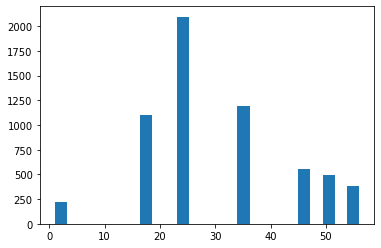

In [26]:
plt.hist(data=Age_group,x=[users.Age], bins=25)
plt.show()

###### Maximum users are around 25 years of age. Around 75% users are in the age group of 18 to 35 years.

In [27]:
Gender_group = users.groupby('Gender').size()
Gender_group

Gender
F    1709
M    4331
dtype: int64

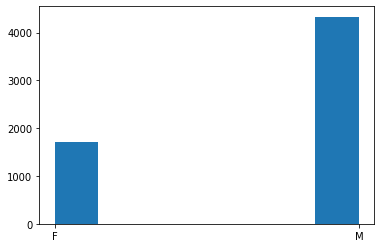

In [28]:
plt.hist(data=Gender_group,x=[users.Gender], bins=7)
plt.show()

In [29]:
# 2.User rating of the movie “Toy Story”
User_group = ratings.groupby(['UserID']).size() #user ratings
User_group.head(10)

UserID
1      53
2     129
3      51
4      21
5     198
6      71
7      31
8     139
9     106
10    401
dtype: int64

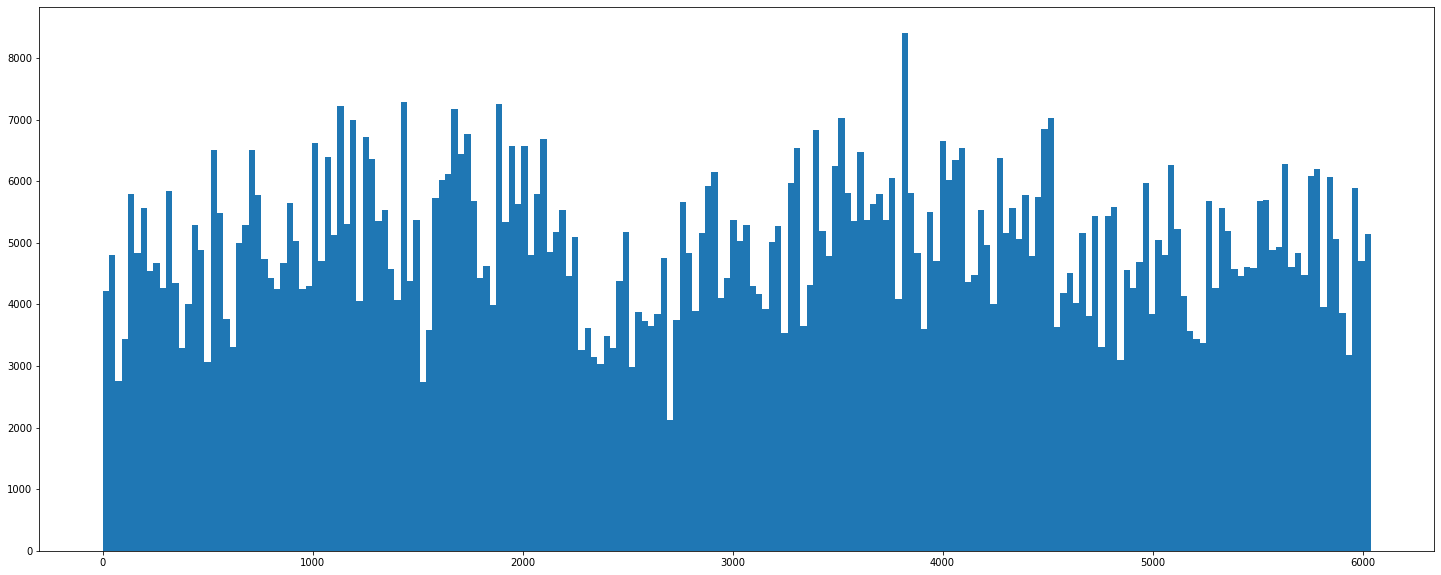

In [30]:
plt.figure(figsize=(25,10))
plt.hist(x=[ratings.UserID], bins=200)
plt.show()

In [31]:
#toy story data
ToyStory_data = ratings[ratings.MovieID==1] # MovieID=1=Toy Story (1995)
ToyStory_data.head(10)

,UserID,MovieID,Rating,Timestamp
40,1,1,5,978824268
469,6,1,4,978237008
581,8,1,4,978233496
711,9,1,5,978225952
837,10,1,5,978226474
1966,18,1,4,978154768
2276,19,1,5,978555994
2530,21,1,3,978139347
2870,23,1,4,978463614
3405,26,1,3,978130703


In [32]:
ToyStory_data.groupby('Rating').size()

Rating
1     16
2     61
3    345
4    835
5    820
dtype: int64

##### Toy Story (1995) is rated mostly in range 4-5. Very few users have given rating of 1 and 2.

In [33]:
ToyStory_data_group = ToyStory_data.groupby('Rating')
ToyStory_data_group.agg({'Rating':'mean'})

,Rating
Rating,
1,1
2,2
3,3
4,4
5,5


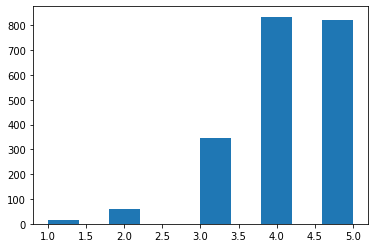

In [34]:
plt.hist(x=ToyStory_data['Rating'])
plt.show()

In [35]:
# 3.Top 25 movies by viewership rating
movie_rating = Master_Data[['Title', 'Rating']].groupby('Title').mean().sort_values('Rating', ascending=False)
movie_rating.head(25)

,Rating
Title,
Ulysses (Ulisse) (1954),5.000000
Lured (1947),5.000000
Follow the Bitch (1998),5.000000
Bittersweet Motel (2000),5.000000
Song of Freedom (1936),5.000000
One Little Indian (1973),5.000000
Smashing Time (1967),5.000000
Schlafes Bruder (Brother of Sleep) (1995),5.000000
"Gate of Heavenly Peace, The (1995)",5.000000


In [36]:
# 4.Find the ratings for all the movies reviewed by for a particular user of user id = 2696.
Master_Data = Master_Data[Master_Data['UserID']==2696]
Master_Data.head()

,MovieID,Title,UserID,Age,Gender,Occupation,Rating,Genres
24345,1270,Back to the Future (1985),2696,25,M,7,2,Comedy|Sci-Fi
29848,1097,E.T. the Extra-Terrestrial (1982),2696,25,M,7,3,Children's|Drama|Fantasy|Sci-Fi
244232,1617,L.A. Confidential (1997),2696,25,M,7,4,Crime|Film-Noir|Mystery|Thriller
250014,800,Lone Star (1996),2696,25,M,7,5,Drama|Mystery
273633,3386,JFK (1991),2696,25,M,7,1,Drama|Mystery


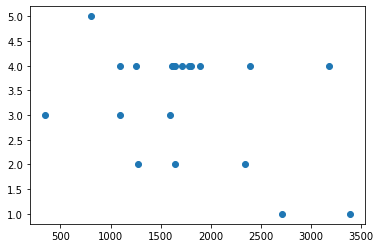

In [37]:
plt.scatter(x=Master_Data['MovieID'], y=Master_Data['Rating'])
plt.show()

##### Feature Engineering:

In [38]:
# Use column genres:
# 1. Find out all the unique genres.
# (Hint: split the data in column genre making a list and then process the data to find out only the unique categories of genres)
movies['Lis_genres'] = movies['Genres'].apply(lambda x : str(x).split('|'))
movies.head()

,MovieID,Title,Genres,Lis_genres
0,1,Toy Story (1995),Animation|Children's|Comedy,"[Animation, Children's, Comedy]"
1,2,Jumanji (1995),Adventure|Children's|Fantasy,"[Adventure, Children's, Fantasy]"
2,3,Grumpier Old Men (1995),Comedy|Romance,"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),Comedy|Drama,"[Comedy, Drama]"
4,5,Father of the Bride Part II (1995),Comedy,[Comedy]


In [39]:
#unique genres.
Genres=[]
for i in movies['Lis_genres']:
    Genres.extend(i)
    
Genres=set(Genres)
print(Genres)

{'Fantasy', "Children's", 'Thriller', 'War', 'Horror', 'Western', 'Romance', 'Drama', 'Mystery', 'Adventure', 'Animation', 'Musical', 'Comedy', 'Action', 'Sci-Fi', 'Film-Noir', 'Crime', 'Documentary'}


In [40]:
Master_Data.head()

,MovieID,Title,UserID,Age,Gender,Occupation,Rating,Genres
24345,1270,Back to the Future (1985),2696,25,M,7,2,Comedy|Sci-Fi
29848,1097,E.T. the Extra-Terrestrial (1982),2696,25,M,7,3,Children's|Drama|Fantasy|Sci-Fi
244232,1617,L.A. Confidential (1997),2696,25,M,7,4,Crime|Film-Noir|Mystery|Thriller
250014,800,Lone Star (1996),2696,25,M,7,5,Drama|Mystery
273633,3386,JFK (1991),2696,25,M,7,1,Drama|Mystery


In [41]:
# 2.Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genrefor i in Genres:
for i in Genres:
    print(i)
    Master_Data[i]=Master_Data['Genres'].apply(lambda x: 1 if i in x else 0)
Master_Data.head(1)

Fantasy
Children's
Thriller
War
Horror
Western
Romance
Drama
Mystery
Adventure
Animation
Musical
Comedy
Action
Sci-Fi
Film-Noir
Crime
Documentary


,MovieID,Title,UserID,Age,Gender,Occupation,Rating,Genres,Fantasy,Children's,Thriller,War,Horror,Western,Romance,Drama,Mystery,Adventure,Animation,Musical,Comedy,Action,Sci-Fi,Film-Noir,Crime,Documentary
24345,1270,Back to the Future (1985),2696,25,M,7,2,Comedy|Sci-Fi,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0


In [42]:
# 3.Determine the features affecting the ratings of any particular movie.
Master_Data.corr()

,MovieID,UserID,Age,Occupation,Rating,Fantasy,Children's,Thriller,War,Horror,Western,Romance,Drama,Mystery,Adventure,Animation,Musical,Comedy,Action,Sci-Fi,Film-Noir,Crime,Documentary
MovieID,1.000000,NaN,NaN,NaN,-0.398566,-0.207720,-0.207720,0.172338,NaN,0.213847,NaN,NaN,-0.022056,0.010739,NaN,NaN,NaN,-0.122411,NaN,-0.262374,-0.026899,0.030145,NaN
UserID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,-0.398566,NaN,NaN,NaN,1.000000,-0.062568,-0.062568,0.104828,NaN,-0.277732,NaN,NaN,0.055670,0.262432,NaN,NaN,NaN,-0.090909,NaN,-0.242424,0.212121,0.317408,NaN
Fantasy,-0.207720,NaN,NaN,NaN,-0.062568,1.000000,1.000000,-0.312641,NaN,-0.150188,NaN,NaN,0.280976,-0.397360,NaN,NaN,NaN,-0.076472,NaN,0.688247,-0.076472,-0.150188,NaN
Children's,-0.207720,NaN,NaN,NaN,-0.062568,1.000000,1.000000,-0.312641,NaN,-0.150188,NaN,NaN,0.280976,-0.397360,NaN,NaN,NaN,-0.076472,NaN,0.688247,-0.076472,-0.150188,NaN
Thriller,0.172338,NaN,NaN,NaN,0.104828,-0.312641,-0.312641,1.000000,NaN,0.251630,NaN,NaN,-0.470757,0.302614,NaN,NaN,NaN,-0.454257,NaN,-0.454257,0.244600,0.022875,NaN
War,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Horror,0.213847,NaN,NaN,NaN,-0.277732,-0.150188,-0.150188,0.251630,NaN,1.000000,NaN,NaN,-0.534522,-0.377964,NaN,NaN,NaN,-0.218218,NaN,-0.218218,-0.218218,0.047619,NaN


In [43]:
Master_Data.corr()[['Rating']]

,Rating
MovieID,-0.398566
UserID,NaN
Age,NaN
Occupation,NaN
Rating,1.000000
Fantasy,-0.062568
Children's,-0.062568
Thriller,0.104828
War,NaN
Horror,-0.277732


In [44]:
Master_Data.columns

Index(['MovieID', 'Title', 'UserID', 'Age', 'Gender', 'Occupation', 'Rating',
       'Genres', 'Fantasy', 'Children's', 'Thriller', 'War', 'Horror',
       'Western', 'Romance', 'Drama', 'Mystery', 'Adventure', 'Animation',
       'Musical', 'Comedy', 'Action', 'Sci-Fi', 'Film-Noir', 'Crime',
       'Documentary'],
      dtype='object')

In [45]:
Master_Data.head(1)

,MovieID,Title,UserID,Age,Gender,Occupation,Rating,Genres,Fantasy,Children's,Thriller,War,Horror,Western,Romance,Drama,Mystery,Adventure,Animation,Musical,Comedy,Action,Sci-Fi,Film-Noir,Crime,Documentary
24345,1270,Back to the Future (1985),2696,25,M,7,2,Comedy|Sci-Fi,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [47]:
# 4.Develop an appropriate model to predict the movie ratings
x=Master_Data[['Age', 'Comedy', 'Adventure', 'Musical', 'Animation','Thriller','Sci-Fi', 'Crime', 'Film-Noir', 'Horror', 'Fantasy', 'Action', 
               'War','Mystery', 'Romance', 'Western', 'Drama', "Children's", 'Documentary']] # Feature
y=Master_Data['Rating'] #Target/Label/Y

In [48]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.2)

In [49]:
model=LinearRegression()

In [50]:
model.fit(x_train,y_train)

LinearRegression()

In [51]:
model.predict(x_test)

array([4.        , 5.01960784, 4.22875817, 4.        ])